### Import the data

In [1]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip the data
import zipfile
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip","r")
zip_ref.extractall()
zip_ref.close()

--2024-01-21 06:05:55--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.1.207, 142.250.103.207, 108.177.120.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.1.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  35.3MB/s    in 5.5s    

2024-01-21 06:06:00 (90.7 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [2]:
import os

# wwalkthrough the data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

There are 2 directories and 0 images in '10_food_classes_all_data'
There are 10 directories and 0 images in '10_food_classes_all_data/train'
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'
There are 1

In [3]:
# set up the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [4]:
# Lets get the subdirectories (These are classnames)
import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)


['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [5]:
# Visualize the data
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  '''
  Input:
  target_dir : target directory
  target_class : target classes

  Output:
  Prints the random image from the providied directory
  '''
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

['3629996.jpg']
Image shape: (512, 512, 3)


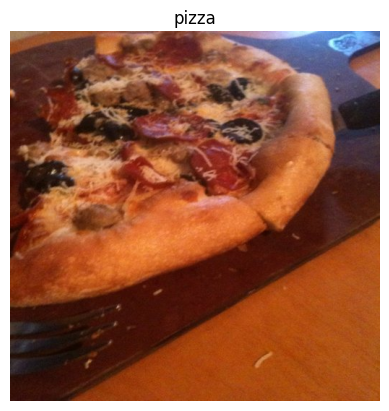

In [6]:
img = view_random_image(target_dir = train_dir, target_class = random.choice(class_names))

In [7]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

### Preprocess the data

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale the data
train_datagen = ImageDataGenerator(rescale = 1/255.0 )
test_datagen = ImageDataGenerator(rescale = 1/255.0 )

In [9]:
# Load the data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224, 224),
                                               class_mode = "categorical",
                                               batch_size = 32)

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = (224, 224),
                                             class_mode = "categorical",
                                             batch_size = 32)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### Create the model

#### Baseline Model

In [10]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import  Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy

In [11]:
# Create the model
model_1 = Sequential([
    Conv2D(10, 3, activation = "relu", input_shape =(224, 224, 3)),
    MaxPool2D(pool_size = (2,2)),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(pool_size = (2,2)),
    Conv2D(10, 3, activation= "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation = "softmax")
])

In [12]:
# Compile the model
model_1.compile(loss = "categorical_crossentropy",
                optimizer = Adam(),
                metrics = ['accuracy'])

In [13]:
# Fit the model
history_1 = model_1.fit(train_data,
                        validation_data = test_data,
                        epochs = 5)

Epoch 1/5
235/235 [==============================] - 43s 167ms/step - loss: 2.1145 - accuracy: 0.2369 - val_loss: 1.9702 - val_accuracy: 0.3004
Epoch 2/5
235/235 [==============================] - 38s 163ms/step - loss: 1.8879 - accuracy: 0.3412 - val_loss: 1.9027 - val_accuracy: 0.3352
Epoch 3/5
235/235 [==============================] - 29s 123ms/step - loss: 1.7157 - accuracy: 0.4028 - val_loss: 1.8648 - val_accuracy: 0.3564
Epoch 4/5
235/235 [==============================] - 29s 125ms/step - loss: 1.5073 - accuracy: 0.4924 - val_loss: 1.9048 - val_accuracy: 0.3604
Epoch 5/5
235/235 [==============================] - 31s 130ms/step - loss: 1.2717 - accuracy: 0.5712 - val_loss: 1.9976 - val_accuracy: 0.3556


In [14]:
# summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 10)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 10)        0

In [16]:
# evaluate the model
model_1.evaluate(test_data)

79/79 [==============================] - 8s 102ms/step - loss: 1.9976 - accuracy: 0.3556


[1.997588872909546, 0.3555999994277954]

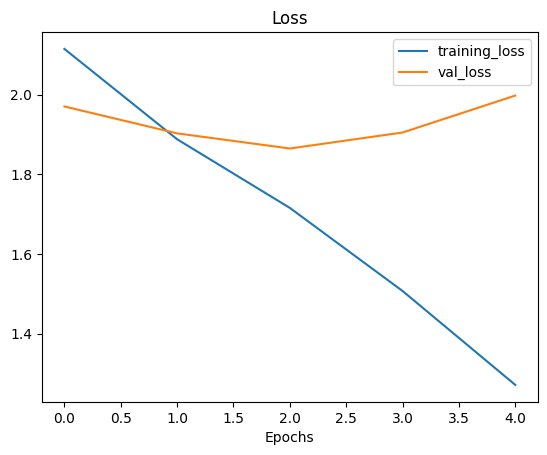

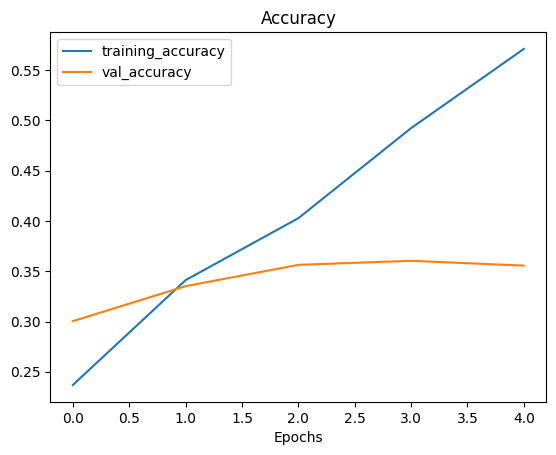

In [17]:
# plot the graphs
plot_loss_curves(history_1)

### Adjust the model hyperparameters

In [18]:
## Simplify the model by  removing 2 conv layers
model_2 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])

# Compile
model_2.compile(loss = "categorical_crossentropy",
                optimizer = Adam(),
                metrics = ['accuracy'])

# Fit
history_2 = model_2.fit(train_data,
                        validation_data = test_data,
                        epochs =5)

Epoch 1/5
235/235 [==============================] - 34s 140ms/step - loss: 2.1502 - accuracy: 0.2271 - val_loss: 1.9965 - val_accuracy: 0.2836
Epoch 2/5
235/235 [==============================] - 33s 139ms/step - loss: 1.7790 - accuracy: 0.3869 - val_loss: 1.9291 - val_accuracy: 0.3096
Epoch 3/5
235/235 [==============================] - 30s 127ms/step - loss: 1.3553 - accuracy: 0.5523 - val_loss: 2.0397 - val_accuracy: 0.3124
Epoch 4/5
235/235 [==============================] - 29s 125ms/step - loss: 0.8489 - accuracy: 0.7357 - val_loss: 2.2898 - val_accuracy: 0.3036
Epoch 5/5
235/235 [==============================] - 34s 145ms/step - loss: 0.4324 - accuracy: 0.8811 - val_loss: 2.8083 - val_accuracy: 0.3012


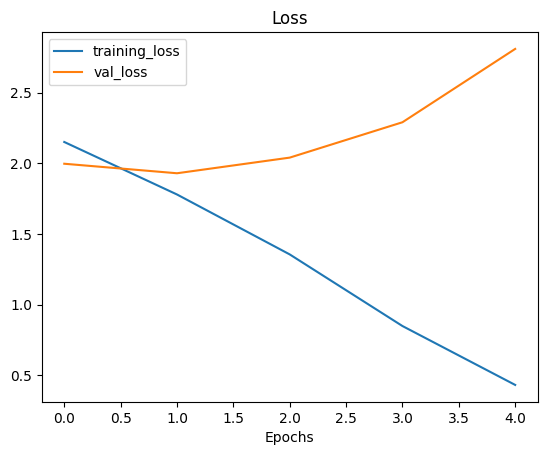

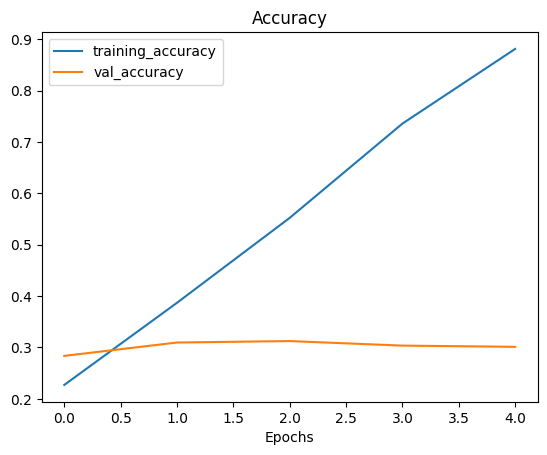

In [19]:
plot_loss_curves(history_2)

Not much change in the output
Model 2 parameter count has increased from model 1 parameters count.

### Use Augmentation for the data

In [21]:
print("Generating augmented data")
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # note: this is an int not a float
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size = (224, 224),
                                                                   class_mode= "categorical",
                                                                   batch_size = 32)

Generating augmented data
Found 7500 images belonging to 10 classes.


In [22]:
# Lets create the model but this time we will overfit it on the augmented data
import tensorflow as tf



In [23]:
model_3 = tf.keras.models.clone_model(model_1)

In [24]:
# Compile the cloned model
model_3.compile(loss = "categorical_crossentropy",
                optimizer = Adam(),
                metrics = ['accuracy'])

model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 10)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 10)        0

In [25]:
# Fit the model
history_3 = model_3.fit(train_data_augmented,
                        validation_data = test_data,
                        epochs = 5)

Epoch 1/5
235/235 [==============================] - 118s 496ms/step - loss: 2.2098 - accuracy: 0.1815 - val_loss: 2.0526 - val_accuracy: 0.2608
Epoch 2/5
235/235 [==============================] - 111s 471ms/step - loss: 2.0714 - accuracy: 0.2620 - val_loss: 1.9876 - val_accuracy: 0.3008
Epoch 3/5
235/235 [==============================] - 113s 480ms/step - loss: 2.0338 - accuracy: 0.2839 - val_loss: 1.9004 - val_accuracy: 0.3368
Epoch 4/5
235/235 [==============================] - 109s 463ms/step - loss: 2.0016 - accuracy: 0.3029 - val_loss: 1.8831 - val_accuracy: 0.3524
Epoch 5/5
235/235 [==============================] - 112s 478ms/step - loss: 1.9743 - accuracy: 0.3173 - val_loss: 1.8494 - val_accuracy: 0.3488


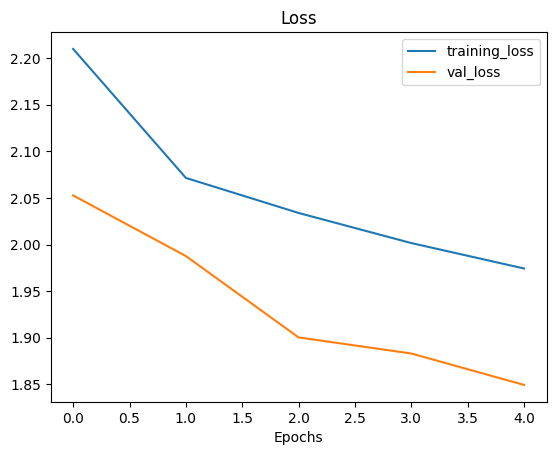

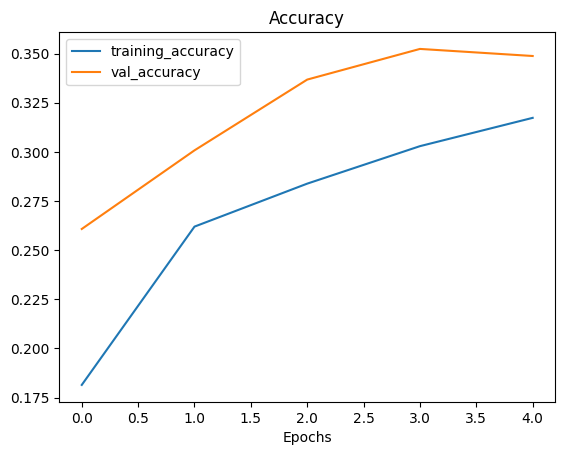

In [26]:
plot_loss_curves(history_3)

### Making the predictions

In [27]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [30]:
!wget -q https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-hamburger.jpeg?raw=true
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

In [36]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [46]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 19ms/step


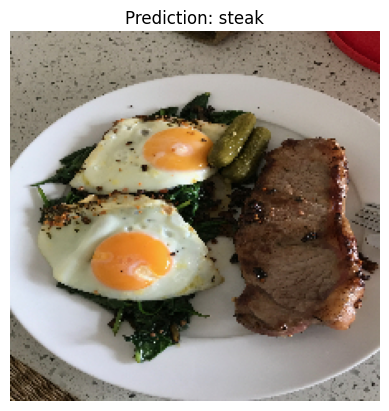

In [47]:
# Make a prediction using model_11
pred_and_plot(model=model_3,
              filename="03-steak.jpeg",
              class_names=class_names)

1/1 [==============================] - 0s 19ms/step


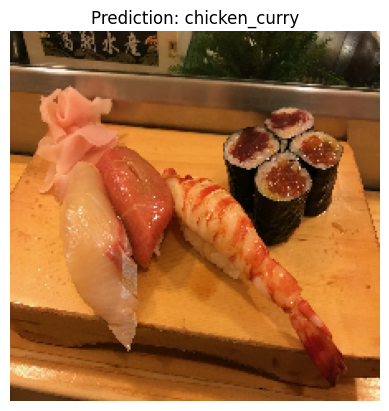

In [48]:
# Make a prediction using model_11
pred_and_plot(model=model_3,
              filename="03-sushi.jpeg",
              class_names=class_names)

1/1 [==============================] - 0s 63ms/step


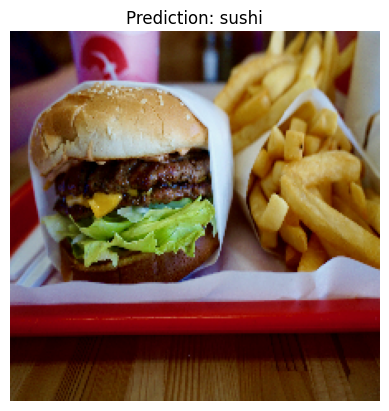

In [49]:
# Make a prediction using model_11
pred_and_plot(model=model_3,
              filename="03-hamburger.jpeg",
              class_names=class_names)

1/1 [==============================] - 0s 19ms/step


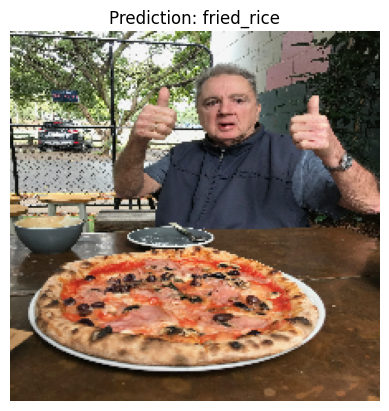

In [50]:
# Make a prediction using model_11
pred_and_plot(model=model_3,
              filename="03-pizza-dad.jpeg",
              class_names=class_names)

### Saving and Loading the model

In [51]:
## Save the model
model_3.save("Saved_Model_3")

In [52]:
# Load the model
loaded_model = tf.keras.models.load_model("Saved_Model_3")
loaded_model.evaluate(test_data)

79/79 [==============================] - 10s 117ms/step - loss: 1.8494 - accuracy: 0.3488


[1.849407434463501, 0.34880000352859497]

In [53]:
model_3.evaluate(test_data)

79/79 [==============================] - 8s 100ms/step - loss: 1.8494 - accuracy: 0.3488


[1.84940767288208, 0.34880000352859497]